# High School Alcoholism and Academic Performance

#### Caso de estudo: análise exploratória de dados e aplicação comparativa de modelos de predição.

#### Trabalho realizado em compromisso com a disciplina de Aprendizedo de Máquina, ministrada pela professora Flavia Cristina Bernardini

O dataset foi escolhido por meio da plataforma do Kaggle (https://www.kaggle.com), e pode ser acessado via link https://www.kaggle.com/datasets/gabrielluizone/high-school-alcoholism-and-academic-performance/data.<br><br>
A escolha do dataset foi feita tendo como critérios:<br>
1. Complexidade do dataset;<br>
2. Utilidade dos resultados;<br>
3. Usabilidade do dataset para a finalidade proposta;<br>
4. Possibilidade de explorar técnicas de pré-processameto.<br>

Além disso, um fator decisivo para a escolha desse dataset é que este já foi utilizado para publicação de artigo cintífico, que pode ser encontrado através da citação abaixo:

![My Image](citation.png)

A descrição do dataset pode ser conferida a seguir:

![My Image](datasetDescription1.png)

A descrição das features é dada por:

![My Image](features.png)

#### Bibliotecas necessárias

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)  # Shows all rows
pd.set_option('display.max_columns', None)  # Shows all columns
pd.set_option('display.width', None)  # Adjusts the width to the maximum
pd.set_option('display.max_colwidth', None)  # Shows the full width of each column
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import cross_val_score
import shap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


#### Análise preliminar do dado

In [2]:
data_raw = pd.read_csv('student-lpor.csv')
data_raw.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  schoolsup   649 non-null    object
 15  famsup      649 non-null    object
 16  paid        649 non-null    object
 17  activities  649 non-null    object
 18  nursery     649 non-null    object
 19  higher      649 non-null    object
 20  internet  

In [4]:
colunasCategoricas = data_raw.select_dtypes(include=["object"]).columns
print(f'Existem {len(colunasCategoricas)} colunas no formato Object:')
print(colunasCategoricas)

Existem 17 colunas no formato Object:
Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


Nota-se que não há valores nulos em nenhuma coluna do dataset.<br>
Nota-se que, de 31 colunas, 17 são Object e as demais são int64. As colunas Object precisam ser convertidas para valores numéricos, para que seja possível aplicar modelos de predição.<br>
Das 14 colunas int64, não há nada necessário para ser feito, visto que não há nenhum valor discrepante ou nulo.

In [5]:
data_raw.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000


#### Transformação das variáveis categóricas

As variáveis categóricas em um dataset são aquelas que são representadas como strings. O ideal é que, para aplicação de modelo preditivo, nenhuma coluna seja categórica. Logo, todas as variáveis categóricas precisam ser transformadas em numéricas ou boolenas antes de servirem como entrada para modelos.<br>
Existem duas formas bem conhecidas para transformação de variáveis categóricas: One-Hot Encoding e Label Encoding. A primeira transforma a variável categórica em uma série de colunas booleanas, servindo para situações em que não há hierarquia entre os elementos daquela coluna categórica. A segunda por sua vez atribui um valor numérico para cada elemento, o que acarreta em uma atribuição de rank/hierarquia entre os elementos.<br>
No atual estudo de caso, todas as colunas categóricas apresentam elementos que não possuem rank/hierarquia entre si. Por exemplo, a coluna 'school' tem para cada linha uma string com nomes diferentes de escola. Como não existem hierarquias entre as escolas, a melhor forma de tratar as variáveis categóricas do presente dataset é através do One-Hot Encoding.<br>
Portanto, foi escolhida o método pandas.get_dummies (https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) para proceder as transformações necessárias.


In [6]:
data = pd.get_dummies(data_raw, columns=colunasCategoricas)

In [7]:
data.head()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,4,3,4,1,1,3,4,0,11,True,False,True,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,5,3,3,1,1,3,2,9,11,True,False,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,4,3,2,2,3,3,6,12,13,True,False,True,False,False,True,False,True,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,True,False,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,3,2,2,1,1,5,0,14,14,True,False,True,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,True,False,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,4,3,2,1,2,5,0,11,13,True,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False,True,False,False,True,False,True,True,False,True,False


#### Aplicação de modelos preditivos

A primeira etapa na aplicação de modelos preditivos é a separação das <b>features</b> e do <b>target</b>. O target corresponde à uma ou mais colunas do dataset e é associado ao alvo preditivo. No caso, o alvo da predição é o consumo de alcool no meio da semana (Dalc) e o consumo de alcool nos finais de semana (Walc). As demais colunas são as features, informações que possuem algum grau de relação com o target.<br>
Quatro modelos foram escolhidos para fins comparativos: Random Forest, KNN, SVM e XGBoost. Todos serão submetidos a cross-validation de 5 folds.<br><br>
Primeiramente será feita uma predição com o consumo de álcool nos finais de semana (Walc):

In [8]:
# Separação das features e target:
X = data.drop(['Walc',], axis=1)    # Features
y = data[['Walc']]                  # Target

# Separação do dataset entre treino e validação:
y_adjusted = y - 1  # XGBoost não aceita target com valor numérico zerado
X_train, X_test, y_train, y_test = train_test_split(X, y_adjusted, test_size=0.2, random_state=42, stratify=y_adjusted) # 

# Inicialização dos quatro modelos que serão avaliados:
models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')}

# Aplicação dos modelos e cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y_adjusted.values.ravel(), cv=5, scoring='accuracy')
    print(f"{name} Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Random Forest Accuracy: 0.46 (+/- 0.07)
KNN Accuracy: 0.33 (+/- 0.04)
SVM Accuracy: 0.38 (+/- 0.01)
XGBoost Accuracy: 0.44 (+/- 0.11)


Em uma análise geral, foi obtida uma performance muito pobre, entre 33 e 45%. Esses resultados são estatisticamente piores do que jogar uma moeda. Portanto, a conclusão preliminar é que as dadas features não são capazes de explicar suficiente a ocorrencia do target. Em outras palavras, as informações contidas no dataset não explicão com mínima acurácia o quanto um indivíduo consome de álcool no final de semana.

Agora, procedendo para o consumo de álcool durante a semana (Dalc):

In [9]:
# Separação das features e target:
X = data.drop(['Dalc',], axis=1)    # Features
y = data[['Dalc']]                  # Target

# Separação do dataset entre treino e validação:
y_adjusted = y - 1  # XGBoost não aceita target com valor numérico zerado
X_train, X_test, y_train, y_test = train_test_split(X, y_adjusted, test_size=0.2, random_state=42, stratify=y_adjusted) # 

# Inicialização dos quatro modelos que serão avaliados:
models = {
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')}

# Aplicação dos modelos e cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y_adjusted.values.ravel(), cv=5, scoring='accuracy')
    print(f"{name} Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Random Forest Accuracy: 0.69 (+/- 0.04)
KNN Accuracy: 0.67 (+/- 0.05)
SVM Accuracy: 0.69 (+/- 0.01)
XGBoost Accuracy: 0.69 (+/- 0.11)


Os resultados da predição do consumo de álcool no meio da semana é muito mais interessante que o do final de semana. Aqui, os modelos testados tiveram uma performance razoável na predição do alvo. O modelo mais acertivo foi o Random Forest, com a maior média e o segundo menor desvio padrão mensurados no cross-validation.<br>
Portanto, a análise posteriore seré feita tendo como referência o modelo de maior performance: o Random Forest. 

#### Data Explainability: SHAP values

A etapa de data explainability consiste em explicar como que o modelo definiu estatisticamente as relações entre as features que geram como saída determinado valor do target.<br>
Para mensurar isso, foi utilizada a ferramenta SHAP values.

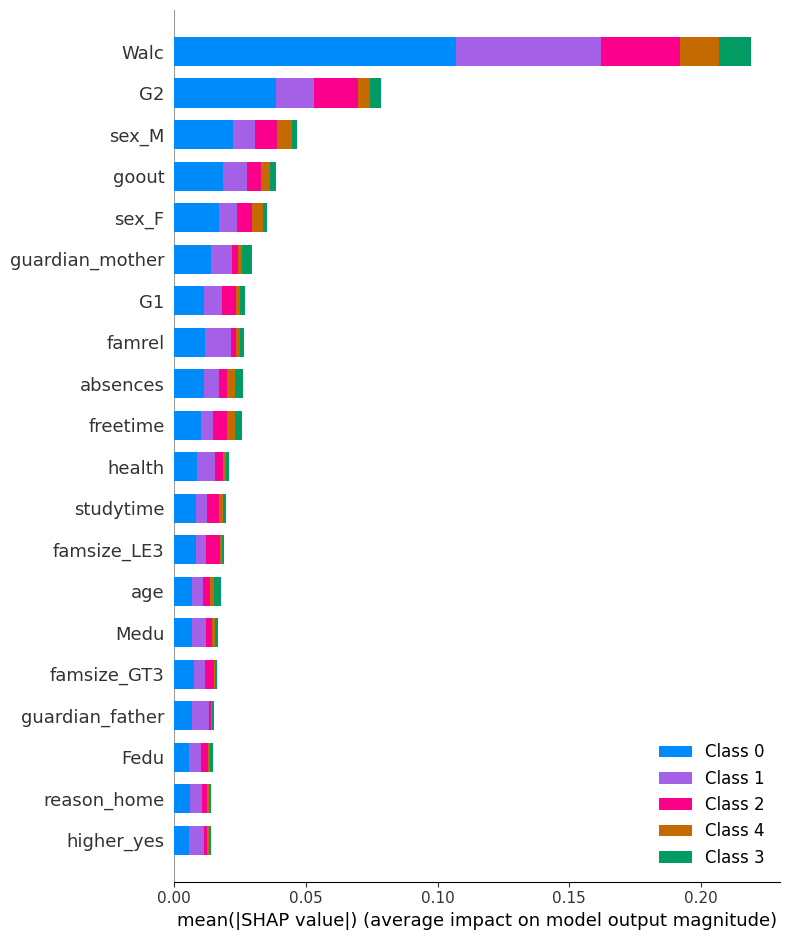

In [29]:
# Treinamento do modelo de maior performance
random_forest_model = RandomForestClassifier().fit(X_train, y_train)
# Criando SHAP explainer object
explainer = shap.TreeExplainer(random_forest_model)
# Calculando SHAP values
shap_values = explainer.shap_values(X_test)
# SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")
plt.show()


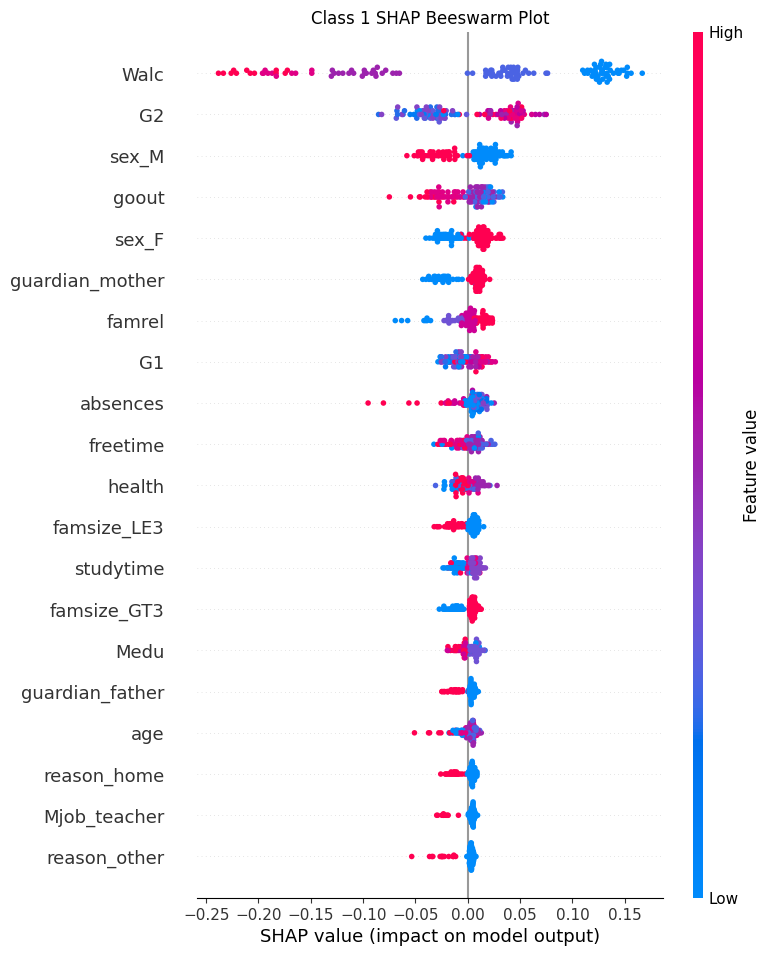

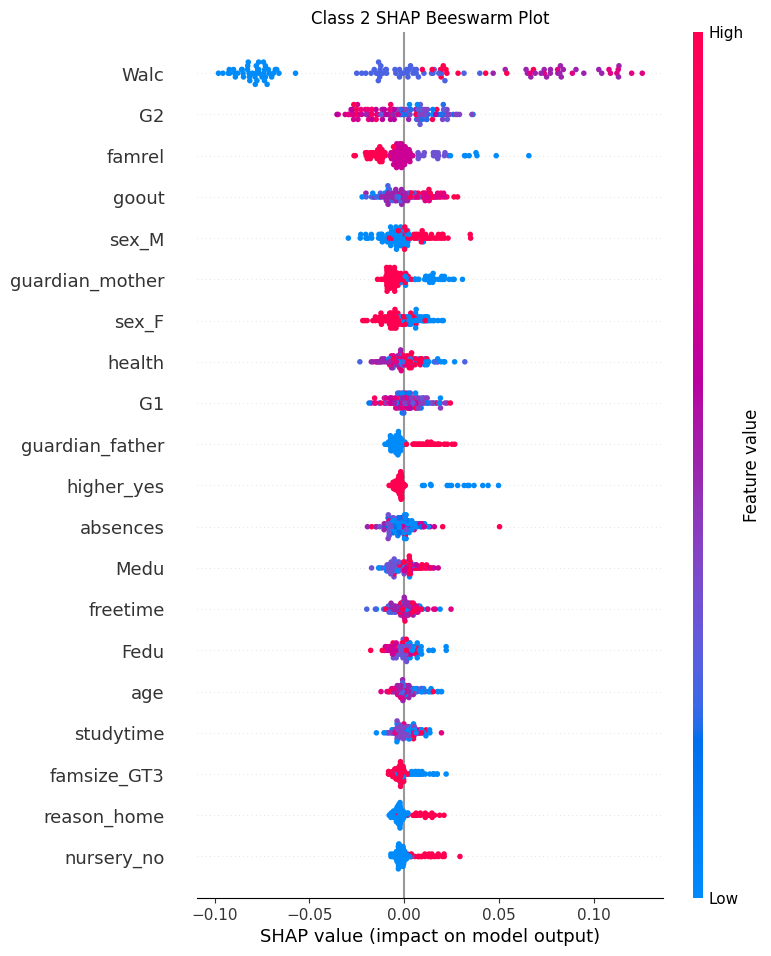

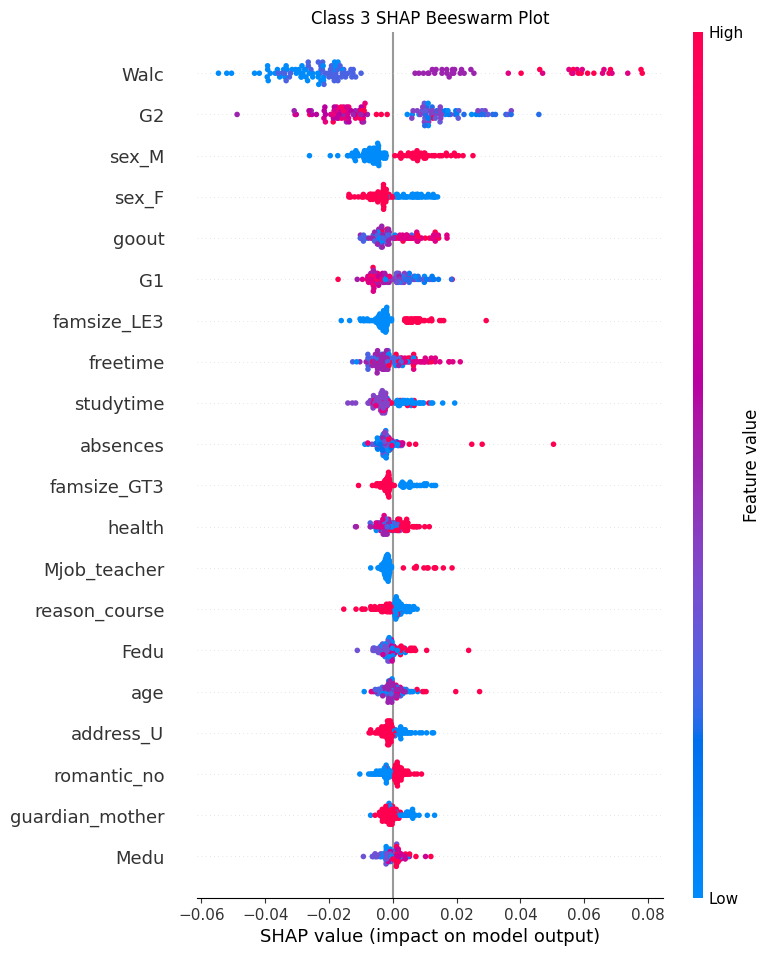

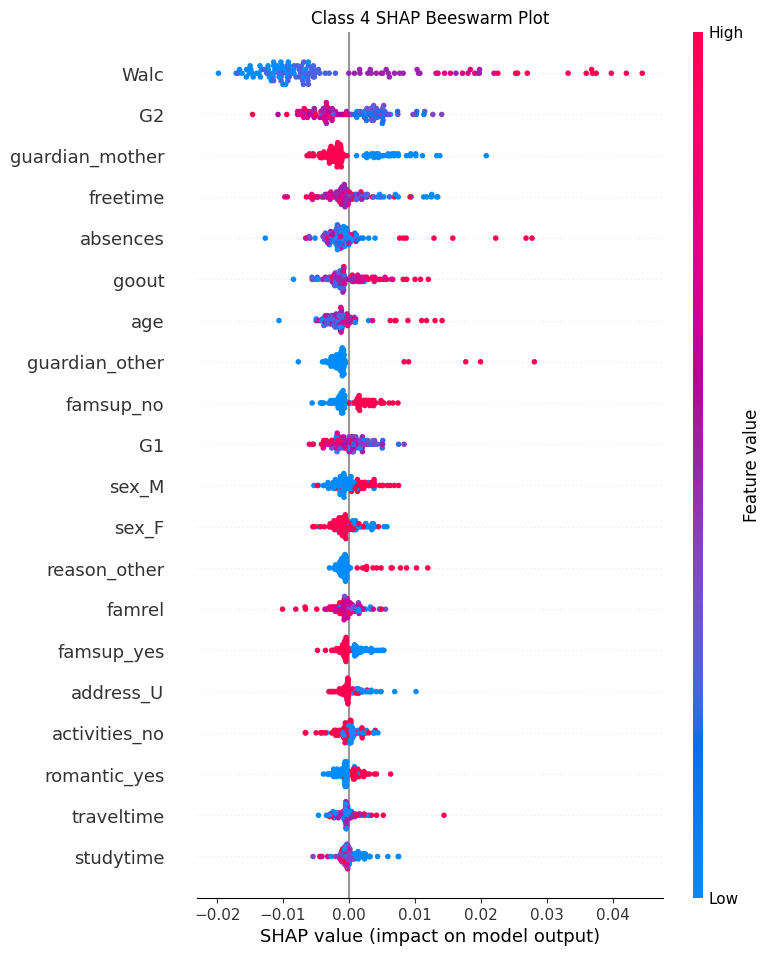

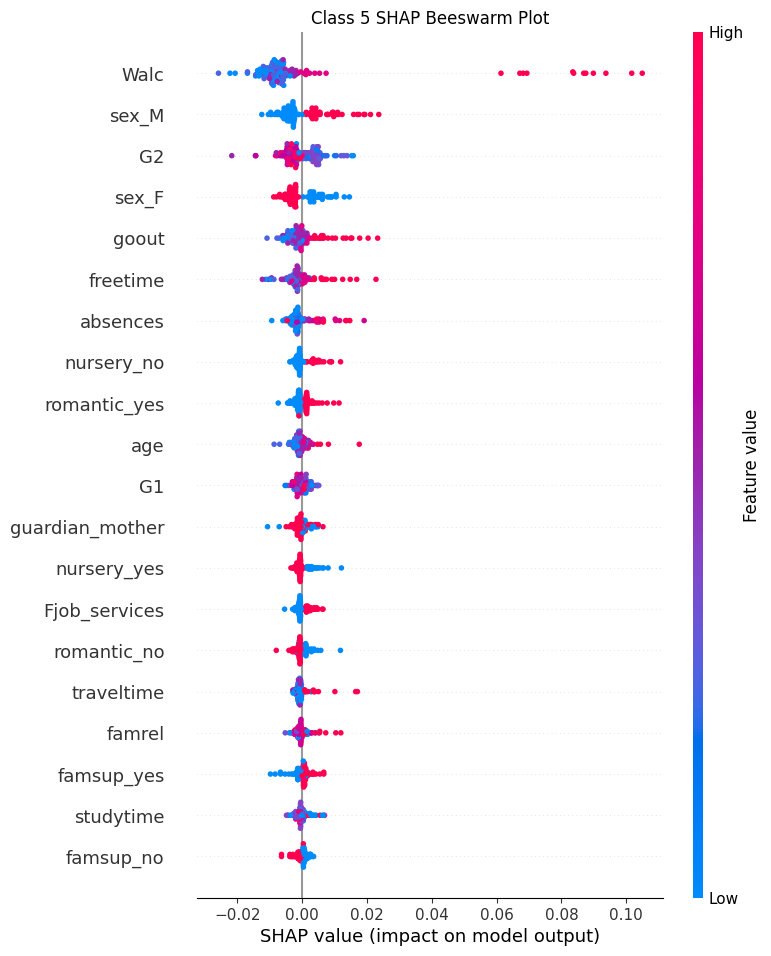

In [31]:
num_classes = len(shap_values)  # Número de classes

for i in range(num_classes):
    class_shap_values = shap_values[i]
    plt.figure()
    shap.summary_plot(class_shap_values, X_test, plot_type="dot", show=False)
    plt.title(f"Class {i+1} SHAP Beeswarm Plot")
    plt.show()

O resultados do SHAP values se mostraram bem interessantes, por exemplo:
1. O consumo de álcool durante a semana está principalmente mais relacionado com o quanto um dado indivíduo bebe nos finais de semana;
2. Um indivíduo que consome nenhum de álcool no meio de semana (Dalc==1) está mais correlacionado com notas maiores em G1 e G2;
3. Um indivíduo que consome pouco ou muito álcool no meio de semana (Dalc>1) está mais correlacionado com notas menores em G1 e G2;
4. Um indivíduo que não bebe no meio de semana também não costuma beber no final de semana;
5. Se o indivíduo é mulher, há grandes chances de ela não beber;
6. As pessoas que mais bebem são aquelas que mais faltam às aulas;
7. Filhos que possuem a mãe como guardiã tendem a não beber.

#### Conclusão

O dataset se mostrou interessante ao relacionar desempenho escolar e consumo de álcool. Em geral, quem bebe o faz tanto no final de semana quanto no meio de semana. Quem não bebe tira melhores notas e costuma ser mulher. Para esse dataset, o problema de álcool e baixo rendimento escolar está principalmente relacionado com os homens.